<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [4]:
#pip install keras

In [5]:
#pip install tensorflow

In [6]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import keras
import tensorflow as tf
from tensorflow.keras import Input

from sklearn import datasets

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [8]:
# read in the data
diabetes = datasets.load_diabetes()


In [9]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Prepare input data

In [11]:
X=diabetes.data
y=diabetes.target

In [12]:
print("Input shape:", X.shape)

Input shape: (442, 10)


### Split the data (training/test)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

### Create the model's architecture

In [16]:
# Set up the model architecture
model = Sequential()

In [17]:
# Add the first hidden layer
model.add(Input(shape=(X.shape[1],)))  # Note the comma to make it a tuple

# Add the second hidden layer
model.add(Dense(4, activation = 'relu'))

# Add the output layer (1 should be used for linear regression)
model.add(Dense(1, activation = 'linear'))

In [18]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

None


### Compile the model

In [20]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

### Fit the training data

In [22]:
%%time
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 100,
    verbose = 1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 31374.7559 - mse: 31374.7559 - val_loss: 25307.2266 - val_mse: 25307.2266
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29824.7832 - mse: 29824.7793 - val_loss: 25299.0273 - val_mse: 25299.0273
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28421.9082 - mse: 28421.9082 - val_loss: 25290.6992 - val_mse: 25290.6992
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32957.9961 - mse: 32957.9961 - val_loss: 25281.7617 - val_mse: 25281.7617
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32814.8633 - mse: 32814.8633 - val_loss: 25272.3789 - val_mse: 25272.3789
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30865.2520 - mse: 30865.2520 - val_loss: 25262.4727 - val_mse: 25262.4727
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29671.6562 - mse: 29671.6562 - val_loss: 25251.9023 - val_mse: 25251.9023
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31799.459

### Create predictions

In [24]:
predictions = np.argmax(model.predict(X_test), axis=-1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


### Evaluate the model

In [26]:
score = model.evaluate(X_test, y_test, batch_size = 315)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 23359.1621 - mse: 23359.1621

Test loss: 23359.162109, Test accuracy: 23359.162109


### Visualisation of cost

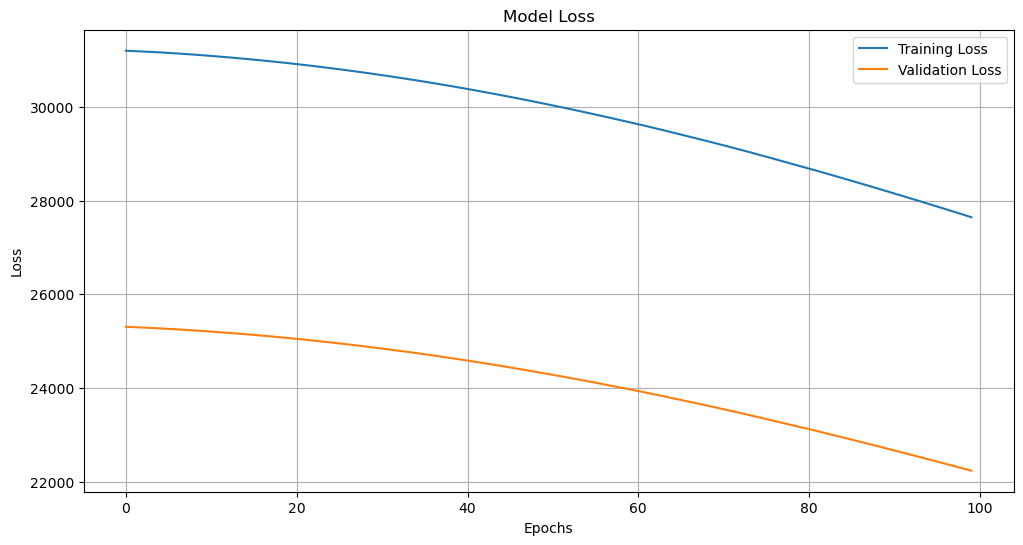

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Visualisation of residuals

In [52]:
# Calculate residuals
residuals = y_test - y_pred.flatten()

# Plotting residuals
plt.figure(figsize=(12, 6))

# Scatter plot of residuals
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Line at y=0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

# Histogram of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

NameError: name 'y_pred' is not defined



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



